In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# used WSL for training
# https://data.mendeley.com/datasets/32b5vfj6tc/1 -- dataset used for training
"/mnt/d/mycoding/TOH_Tire_data_set/TyreNet A High-quality Annotated Dataset for Tyre Defect Classification with Deep Learning Models/Tyre dataset"

In [27]:


IMG_SIZE = (224, 224)
BATCH_SIZE = 16
SEED = 42

BASE_DIR = "/mnt/d/mycoding/TOH_Tire_data_set/TyreNet A High-quality Annotated Dataset for Tyre Defect Classification with Deep Learning Models/split_data"
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    f'{BASE_DIR}/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    f'{BASE_DIR}/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    f'{BASE_DIR}/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 1188 images belonging to 2 classes.


Found 255 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


In [28]:
# Load base model without top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

In [29]:
from tensorflow.keras.layers import BatchNormalization

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # binary classification

model = Model(inputs=base_model.input, outputs=output)

In [30]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-6)
]



In [31]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)


/home/deepak/tf-gpu-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.5513 - loss: 0.8830

2025-06-18 18:43:58.376039: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 8 bytes spill stores, 8 bytes spill loads

2025-06-18 18:43:58.543095: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 8 bytes spill stores, 8 bytes spill loads

2025-06-18 18:43:58.580795: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 112 bytes spill stores, 112 bytes spill loads

2025-06-18 18:43:58.908756: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 5460 bytes spill stores, 5500 bytes spill loads

2025-06-18 18:43:58.975086: I external

75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5528 - loss: 0.8800 - val_accuracy: 0.8392 - val_loss: 0.4152 - learning_rate: 1.0000e-04
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 593ms/step - accuracy: 0.8514 - loss: 0.3825 - val_accuracy: 0.8902 - val_loss: 0.2923 - learning_rate: 1.0000e-04
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 585ms/step - accuracy: 0.9034 - loss: 0.2692 - val_accuracy: 0.8902 - val_loss: 0.2432 - learning_rate: 1.0000e-04
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 625ms/step - accuracy: 0.8865 - loss: 0.2773 - val_accuracy: 0.8863 - val_loss: 0.2203 - learning_rate: 1.0000e-04
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 45s 597ms/step - accuracy: 0.9121 - loss: 0.2320 - val_accuracy: 0.8980 - val_loss: 0.2050 - learning_rate: 1.0000e-04
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 587ms/step - accuracy: 0.9286 - loss: 0.1893 - val_accuracy: 0.9098 - val_loss: 0.1978 - learning_rate: 1.0000e-04
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 44s 580ms/step - accuracy: 0.9240 

In [32]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


/home/deepak/tf-gpu-env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 626ms/step - accuracy: 0.9350 - loss: 0.1686
Test Accuracy: 0.9294
Test Loss: 0.1748


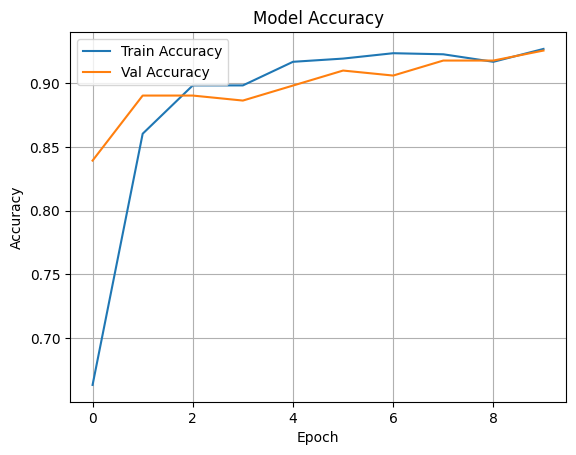

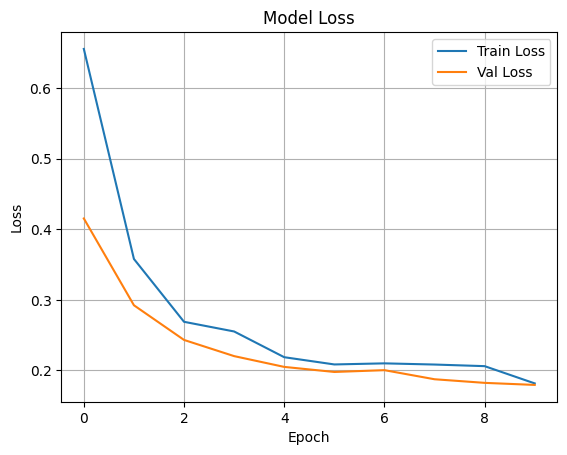

In [33]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
model.save("mobilenet_tire_classifier.h5")


In [ ]:

tf.saved_model.save(model, 'mobilenet_saved_model')